# Demonstration of system capacity change detection

_Bennet Meyers, 9/17/20_

This notebook is a demonstration of the capacity change detection algorithms from Solar Data Tools. System capacity change detection is part of the standard data processing pipeline. The software will alert you if a capacity change is detected in a data set and find the change point(s).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from solardatatools.dataio import load_cassandra_data
from solardatatools import DataHandler
import warnings
warnings.filterwarnings('ignore')

First, we load in an arbitrary power time-series data set. This data set is comprised of five-minute averages of AC power on a small fixed-tilt system with capacity less than 10kW.

In [3]:
df = load_cassandra_data('TAAI01129193')

Query of 261557 rows complete in 6.23 seconds


We have a dataframe of values

In [4]:
df.head()

,site,meas_name,ts,sensor,meas_val_f
0,TAAI01129193,ac_power,2014-01-01 00:00:00,839016424_SPR-8000f,0.77230
1,TAAI01129193,ac_power,2014-01-01 00:05:00,839016424_SPR-8000f,0.40505
2,TAAI01129193,ac_power,2014-01-01 00:10:00,839016424_SPR-8000f,0.30915
3,TAAI01129193,ac_power,2014-01-01 00:15:00,839016424_SPR-8000f,0.28485
4,TAAI01129193,ac_power,2014-01-01 00:20:00,839016424_SPR-8000f,0.25345


This data frame is passed to the `DataHandler` class constructor

total time: 5.57 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              3.46s
Cleaning                   0.21s
Filtering/Summarizing      1.90s
    Data quality           0.26s
    Clear day detect       0.45s
    Clipping detect        0.16s
    Capacity change detect 1.03s


-----------------
DATA SET REPORT
-----------------
length               5.47 years
capacity estimate    6.64 kW
data sampling        5 minutes
quality score        0.82
clearness score      0.37
inverter clipping    True
clipped fraction     0.13
capacity changes     True
data quality warning True
time shift errors    False
time zone errors     False
            
True


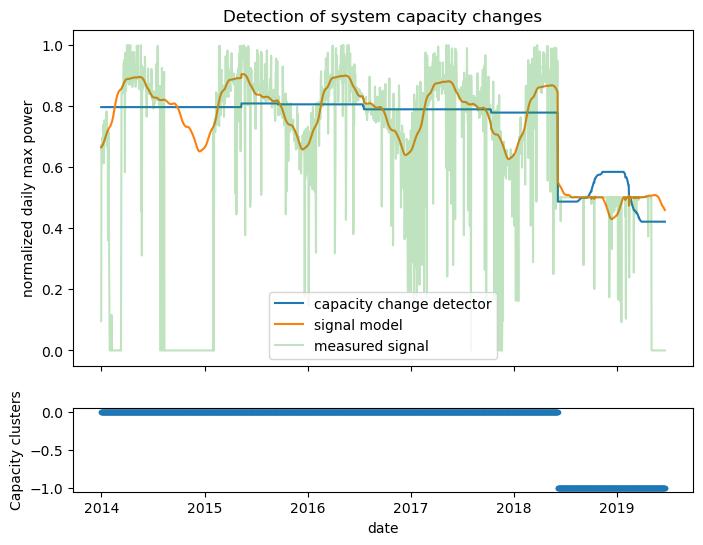

In [6]:
dh = DataHandler(df, convert_to_ts=True)
dh.run_pipeline(power_col=dh.keys[0][-1], solver="MOSEK")
dh.report()
print(dh.capacity_changes)
dh.plot_capacity_change_analysis();

By inspecting the heatmap representation of the power data, we can visually confirm the detected shift in capacity

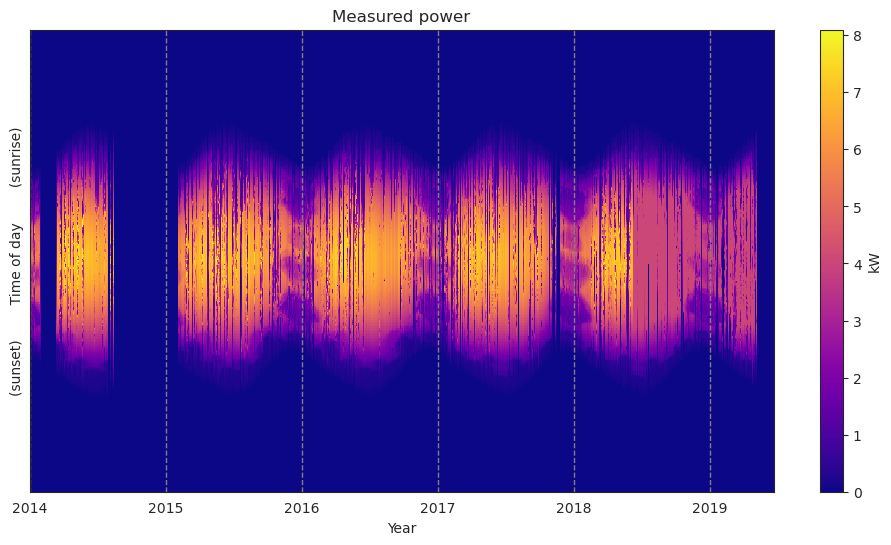

In [7]:
dh.plot_heatmap(matrix='filled');

We have access the the daily labels as well. This allows us to select only days at a certain capacity level for further analysis.

In [18]:
dh.capacity_analysis.labels

array([ 0,  0,  0, ..., -1, -1, -1])

Additionally, we can use this information to find the date of the shift, as shown here.